In [1]:
import numpy as np
import pandas as pd
import math
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import OrderedDict
import time
import matplotlib.pyplot
import scipy as sp


In [2]:
#Import the test data into a single pandas dataframe with labels as a column
test_data = pd.read_csv("faces/X_test.csv", header=None)
test_labels = pd.read_csv("faces/Y_test.csv", names=['label'])
test_data = test_data.join(test_labels)
test_data

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,34,35,34,34,38,36,30,27,24,27,...,44,47,43,42,38,42,41,39,33,1
1,37,31,34,38,41,40,38,42,40,39,...,31,27,25,26,23,26,27,67,133,2
2,104,102,107,109,104,104,106,109,108,107,...,54,56,59,64,58,57,57,56,59,3
3,119,121,122,120,119,121,122,121,114,120,...,83,85,78,82,80,81,77,79,82,4
4,124,126,126,124,125,126,126,126,127,125,...,90,90,88,89,87,90,88,88,85,5
5,157,153,153,154,155,154,154,156,153,156,...,113,115,110,111,114,108,111,106,106,6
6,66,70,71,70,63,70,72,72,75,72,...,70,70,69,78,77,80,72,76,76,7
7,117,114,117,116,113,113,117,113,114,110,...,29,22,32,40,38,38,39,47,68,8
8,111,107,107,111,105,110,112,110,113,111,...,91,85,81,84,86,82,88,87,90,9
9,133,129,132,129,132,129,131,127,130,130,...,28,29,35,35,41,37,32,31,26,10


In [3]:
#Import the training data into a single pandas dataframe with labels as a column
train_data = pd.read_csv("faces/X_train.csv", header=None)
train_labels = pd.read_csv("faces/Y_train.csv", names=['label'])
train_data = train_data.join(train_labels)
train_data

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,48,45,45,49,46,47,45,47,48,53,...,44,47,52,48,49,45,46,47,46,1
1,60,58,68,79,49,43,52,52,56,72,...,40,36,32,33,37,36,33,31,34,1
2,39,44,59,54,62,69,74,61,44,47,...,37,34,31,32,34,28,28,27,29,1
3,63,56,52,40,43,43,29,30,30,24,...,41,35,32,27,24,23,25,28,24,1
4,64,60,63,53,60,41,30,28,38,55,...,44,40,43,42,41,41,35,42,39,1
5,43,45,57,52,45,28,33,43,57,52,...,168,175,174,177,174,176,175,174,169,1
6,41,44,48,44,50,46,46,44,46,50,...,37,35,38,37,35,34,35,33,38,1
7,44,44,41,45,48,39,45,40,33,36,...,42,39,43,41,44,40,37,32,37,1
8,42,41,54,48,43,40,46,45,41,41,...,40,41,42,46,42,43,40,39,41,1
9,35,35,36,39,38,38,35,33,38,34,...,27,29,27,29,29,25,29,35,143,2


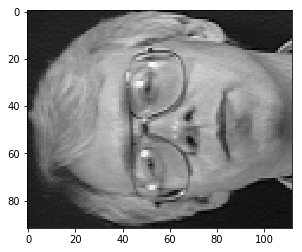

In [4]:
#display a photo
matplotlib.pyplot.imshow(np.reshape(np.array(train_data.iloc[10,:-1]),(92,112)),cmap="gray")

# (a) Visualizing Eigenfaces

In [5]:
#Subtract the mean from the columns and save as new dataframe
norm = train_data.iloc[:,:-1].sub(train_data.iloc[:,:-1].mean(0), axis=1)

#Create covariance matrix
cov = norm.transpose().dot(norm)

#Calculate the eigenvetors from 50 largest eigenvalues
e_val, e_vec = sp.sparse.linalg.eigs(cov.values, k=50)

#Keep only the real portion of the eigen-things
e_val = np.real(e_val)
e_vec = np.real(e_vec)

#Create a new dataframe with index of eigenvalues and rows of eigenvectors
eig = pd.DataFrame(e_vec, columns = e_val).transpose()

In [6]:
eig

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
1.030491e+09,-0.003012,-0.003058,-0.002843,-0.002919,-0.003245,-0.003290,-0.003095,-0.003116,-0.003001,-0.002766,...,-0.002684,-0.002846,-0.003193,-0.003612,-0.004359,-0.004673,-0.004823,-0.005423,-0.006574,-0.007139
7.335405e+08,-0.014601,-0.014555,-0.014559,-0.014544,-0.014361,-0.014115,-0.014143,-0.014212,-0.014124,-0.013967,...,-0.001167,0.000568,0.002451,0.003508,0.005632,0.007459,0.008213,0.007738,0.008391,0.009334
3.960484e+08,-0.020099,-0.020201,-0.019894,-0.019942,-0.019892,-0.019870,-0.019551,-0.019791,-0.019585,-0.019310,...,-0.015701,-0.016276,-0.016902,-0.016414,-0.015764,-0.015809,-0.015653,-0.015494,-0.016148,-0.015117
3.248353e+08,-0.010787,-0.010833,-0.010852,-0.010909,-0.010511,-0.010965,-0.011180,-0.010938,-0.010838,-0.010855,...,0.013615,0.014229,0.015125,0.014766,0.014020,0.012540,0.012670,0.012861,0.012680,0.012452
2.897999e+08,0.002802,0.002844,0.002747,0.002873,0.002930,0.002878,0.002999,0.002656,0.002674,0.002568,...,-0.005027,-0.004687,-0.005490,-0.006053,-0.005521,-0.004192,-0.003313,-0.003649,-0.003852,-0.003770
1.975695e+08,-0.003775,-0.003644,-0.003191,-0.002985,-0.002964,-0.002888,-0.003082,-0.002740,-0.002840,-0.002368,...,0.006927,0.007488,0.007578,0.007526,0.006540,0.004965,0.003914,0.004336,0.004858,0.004123
1.422369e+08,-0.011172,-0.010916,-0.010883,-0.010883,-0.010857,-0.010991,-0.011207,-0.011002,-0.010528,-0.010521,...,-0.004860,-0.004551,-0.004119,-0.003423,-0.002500,-0.003280,-0.004201,-0.005406,-0.005753,-0.004422
1.376333e+08,-0.001891,-0.001860,-0.001589,-0.001932,-0.001932,-0.002163,-0.002427,-0.001816,-0.001607,-0.002054,...,0.009005,0.008917,0.008950,0.010149,0.011276,0.010996,0.010578,0.010037,0.009466,0.009990
1.124131e+08,0.000993,0.001174,0.000919,0.000937,0.001437,0.001641,0.001661,0.001611,0.000767,0.000676,...,-0.015345,-0.016713,-0.018551,-0.019620,-0.021205,-0.022957,-0.023470,-0.021047,-0.018936,-0.016997
1.058494e+08,0.002560,0.002520,0.002990,0.002358,0.002578,0.002777,0.002143,0.002073,0.001675,0.000264,...,-0.001775,-0.001051,-0.000874,-0.002426,-0.003396,-0.002209,-0.002268,-0.001996,-0.000792,-0.000332


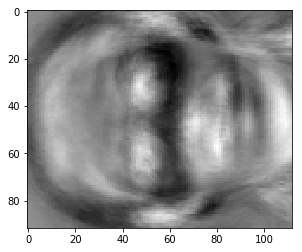

In [7]:
#Plot and save the top 10 eigenvalues associated vectors as images. Creepy....
for i in range (10):
    matplotlib.pyplot.imshow(np.reshape(np.array(eig.iloc[i]),(92,112)),cmap="gray")
    
    #.figure.savefig("Q3_eig_"+str(i+1)+".pdf")

# (b) Face Reconstruction

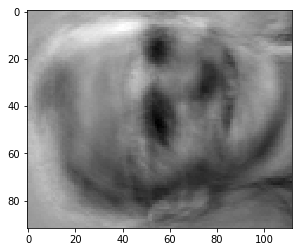

In [8]:
#Calculate the projections of normalized images [1,5,20,30,40] and then re-map them to the vector space and show them
u=[]
x_prime=[]
projections = {}
for i, x in norm.iloc[[0,4,19,29,39]].iterrows():
    u.append(eig.apply(lambda V: x.transpose().dot(V), axis =1))
    x_prime.append(u[-1].dot(eig).values)
    matplotlib.pyplot.imshow(np.reshape(x.values,(92,112)),cmap="gray")
    #.figure.savefig("Q3_b_r"+str(i+1)+".pdf")
    matplotlib.pyplot.imshow(np.reshape(x_prime[-1],(92,112)),cmap="gray")
    #.figure.savefig("Q3_b_f"+str(i+1)+".pdf")
    projections[i] = u[-1]

# (c) Face Recognition

In [9]:
#Subtract the mean from the training data from the test data
n = test_data.iloc[:,:-1].sub(train_data.iloc[:,:-1].mean(0), axis=1)

#Calculate the projections of normalized training and test images in order to reduce dimensionality 

u=[]
x_prime=[]
projections_train = {}
for i, x in norm.iterrows():
    u.append(eig.apply(lambda V: x.transpose().dot(V), axis =1))
    projections_train[i] = u[-1]

u=[]
x_prime=[]
projections_test = {}
for i, x in n.iterrows():
    u.append(eig.apply(lambda V: x.transpose().dot(V), axis =1))
    projections_test[i] = u[-1]
    
#Asign dimension-reduced data to dataframes
X_test = pd.DataFrame.from_dict(projections_test).transpose()
X_train = pd.DataFrame.from_dict(projections_train).transpose()

In [10]:
#Train and test a KNN where k=1
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, train_labels.values)
clf.score(X_test, test_labels.values)

c:\users\k33robin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.95